In [34]:
import pandas as pd
import sys, os
import seaborn as sns
from matplotlib import rcParams

sns.set(rc = {'figure.figsize':(11.7, 7.27)})
rcParams['figure.figsize'] = 10.7, 7.27
sns.set_style('dark')

taiwan_real_estate = pd.read_csv('Downloads/taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


## Visualizing two numeric variables

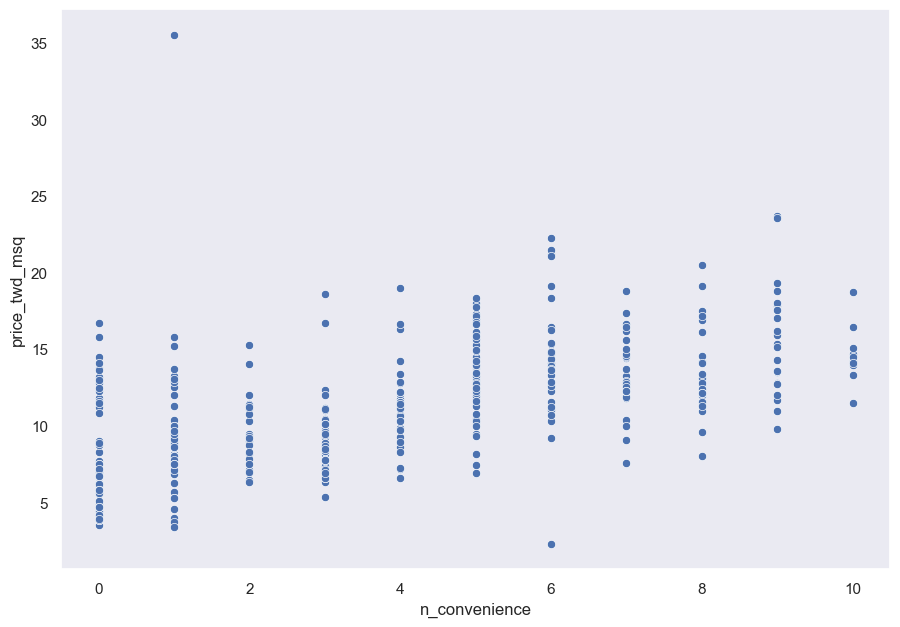

In [2]:
import matplotlib.pyplot as plt
sns.scatterplot(x='n_convenience', y= 'price_twd_msq', data = taiwan_real_estate)
plt.show()


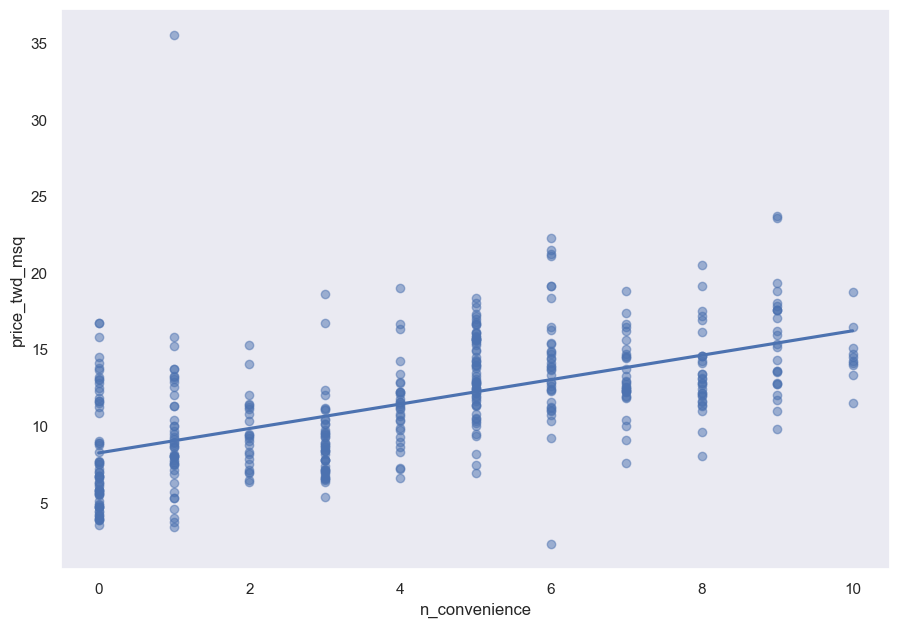

In [3]:
## Draw a trend line across scatterplot
sns.regplot(x = 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate, ci = False, scatter_kws = {'alpha': 0.5})
plt.show()

In [4]:
## Linear Regression with ols

from statsmodels.formula.api import ols
mdl_price_vs_con = ols('price_twd_msq ~ n_convenience', data = taiwan_real_estate)

mdl_price_vs_con = mdl_price_vs_con.fit()

print(mdl_price_vs_con.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


C:\Users\Ravi\AppData\Local\Temp\ipykernel_1020\464129406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(taiwan_real_estate['price_twd_msq'], color = None, bins = 10)


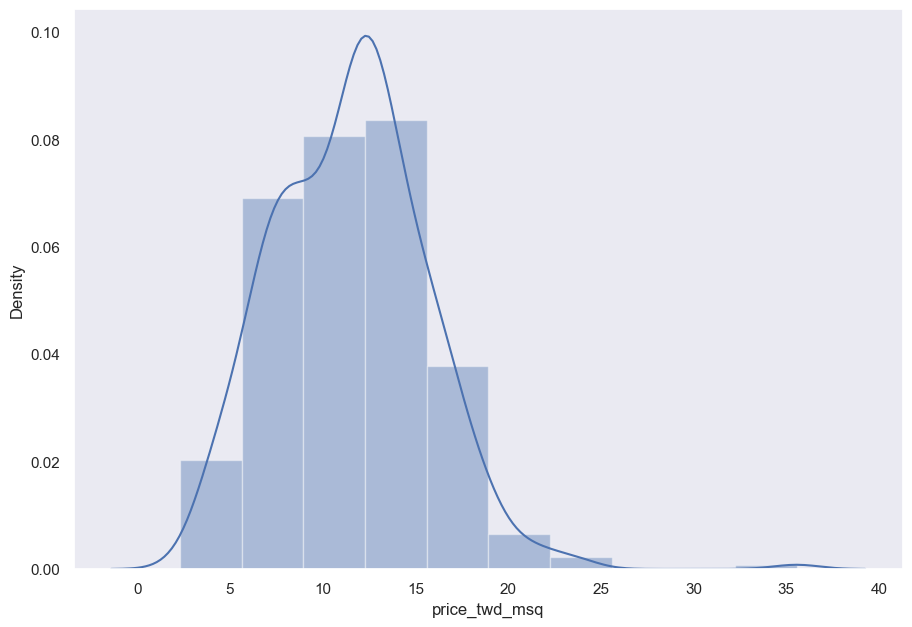

In [5]:
sns.distplot(taiwan_real_estate['price_twd_msq'], color = None, bins = 10)
plt.show()

In [6]:
## Calculating the means by category

mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()
mean_price_by_age


house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

In [7]:
## Linear Regression with categorical variables
mdl_price_age = ols('price_twd_msq ~ house_age_years', data = taiwan_real_estate).fit()
print(mdl_price_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [8]:
## Removing intercept
mdl_price_age0 = ols('price_twd_msq ~ house_age_years +0', data = taiwan_real_estate).fit()
print(mdl_price_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [9]:
## Predicting House prices
import numpy as np

explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

price_twd_msq = mdl_price_vs_con.predict(explanatory_data)
prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


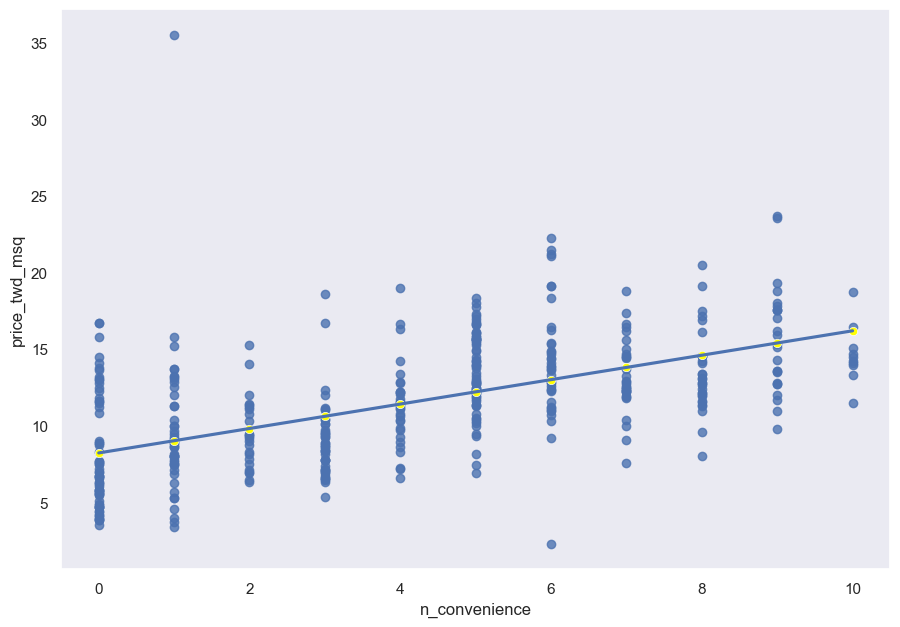

In [10]:
## Visualizing predictions
fig = plt.figure()
sns.regplot(x='n_convenience', y = 'price_twd_msq', data = taiwan_real_estate, ci =None)

sns.scatterplot(x='n_convenience', y='price_twd_msq', data = prediction_data, color ='yellow', alpha=1)
plt.show()

In [11]:
## The limits of prediction

impossible = pd.DataFrame({'n_convenience': [-1,2.5]})

In [12]:
## Extracing model elements
print(mdl_price_vs_con)
print(mdl_price_vs_con.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [13]:
## print the fitted values
print(mdl_price_vs_con.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [14]:
## print the residuals

print(mdl_price_vs_con.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [15]:
print(mdl_price_vs_con.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           3.41e-37
Time:                        10:27:09   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [16]:
## Manually predicting house prices
coeffs = mdl_price_vs_con.params

intercept = coeffs[0]
slope = coeffs[1]

price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

print(price_twd_msq.assign(predictions_auto = mdl_price_vs_con.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


## Regression to the means

In [17]:
## Plotting consecutive portfolio returns
sp500_yearly_returns = pd.read_csv('Downloads/sp500_yearly_returns.csv')
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


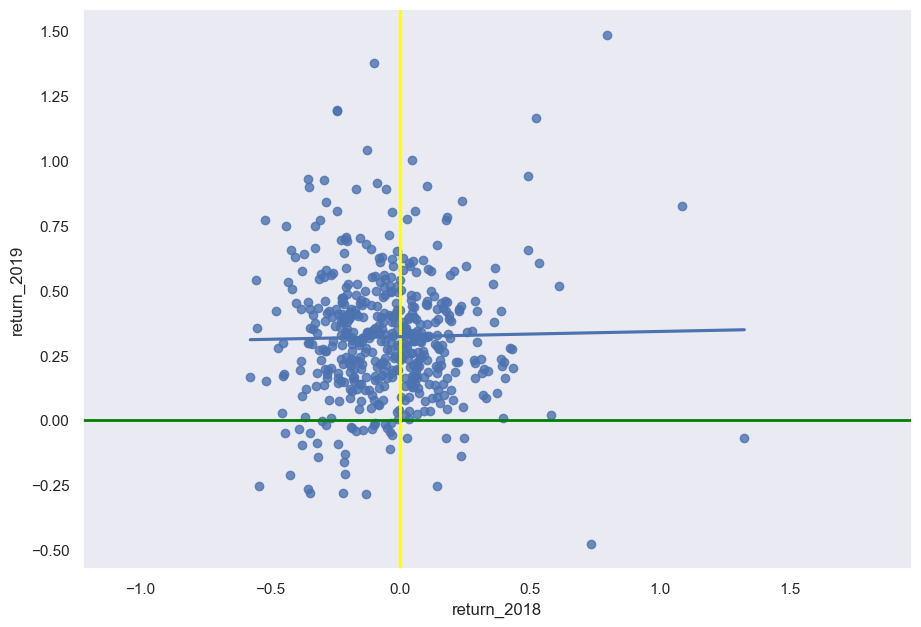

In [18]:
fig = plt.figure()
plt.axhline(y=0, linewidth = 2, color = 'green')
plt.axvline(x=0, linewidth = 2, color = 'yellow')

## Add sscatterplot with regression line

sns.regplot(x='return_2018', y= 'return_2019', data = sp500_yearly_returns, ci = None)

plt.axis('equal')
plt.show()

In [19]:
# Run a linear regression on return_2019 vs. return_2018
# using sp500_yearly_returns

mdl_returns = ols('return_2019 ~ return_2018', data = sp500_yearly_returns).fit()
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [20]:
# Modeling consecutive returns

# Create a DataFrame with return_2018 at -1, 0, and 1 

explanatory_data = pd.DataFrame({'return_2018':[-1,0,1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))


0    0.301251
1    0.321321
2    0.341390
dtype: float64


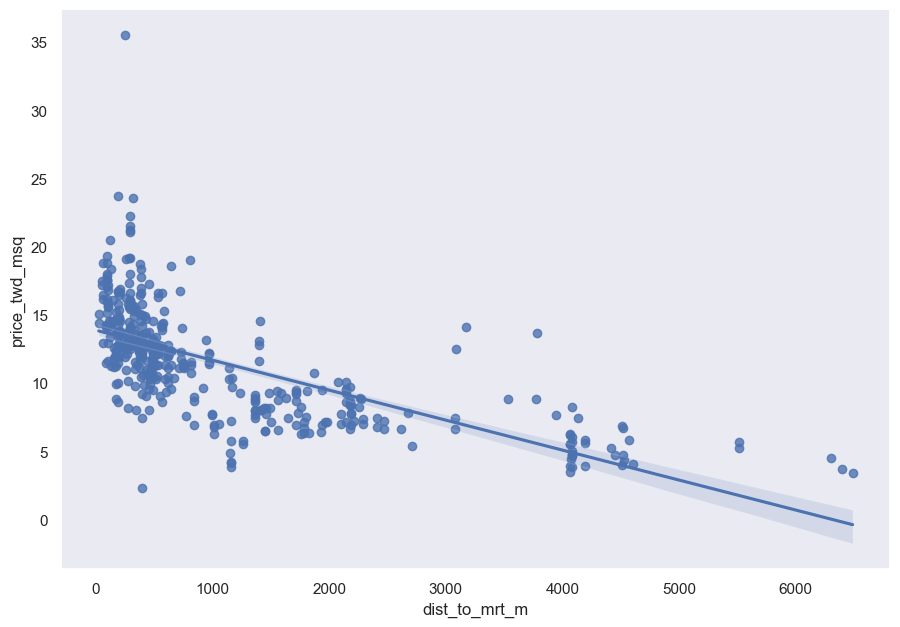

In [21]:
## Transforming the explanatory variables

plt.figure()
sns.regplot(x='dist_to_mrt_m', y= 'price_twd_msq', data = taiwan_real_estate)
plt.show()

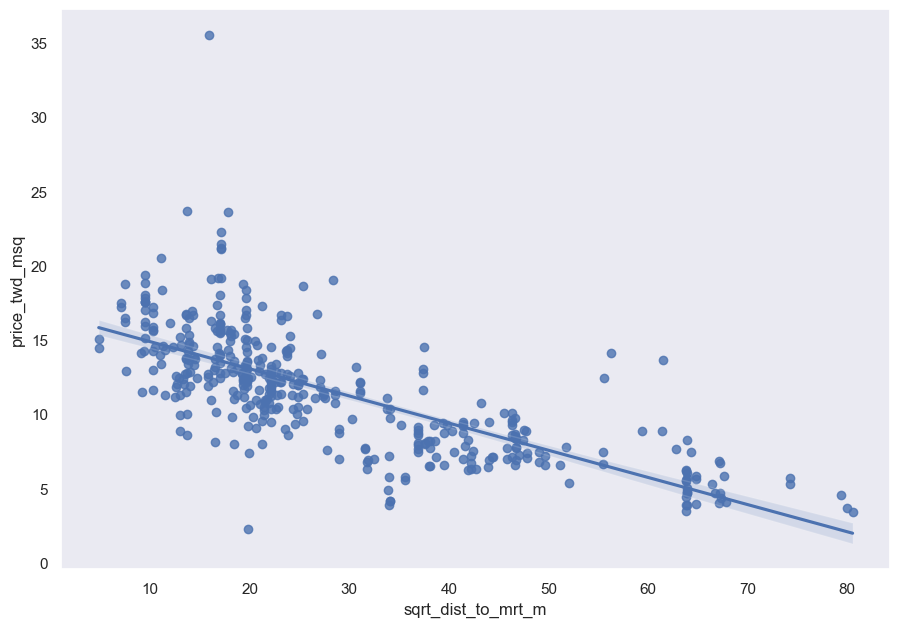

In [22]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate['sqrt_dist_to_mrt_m'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])
plt.figure()
sns.regplot(x='sqrt_dist_to_mrt_m', y= 'price_twd_msq', data = taiwan_real_estate)
plt.show()

In [23]:
# Run a linear regression of price_twd_msq vs. 
# square root of dist_to_mrt_m using taiwan_real_estate

mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data = taiwan_real_estate).fit()
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [24]:
## Create explanatory data
explanatory_data = pd.DataFrame({'sqrt_dist_to_mrt_m': np.sqrt(np.arange(0,81,10) ** 2),
                                 'dist_to_mrt_m': np.arange(0,81,10) ** 2})
# Use mdl_price_vs_dist to predict explanatory_data
price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


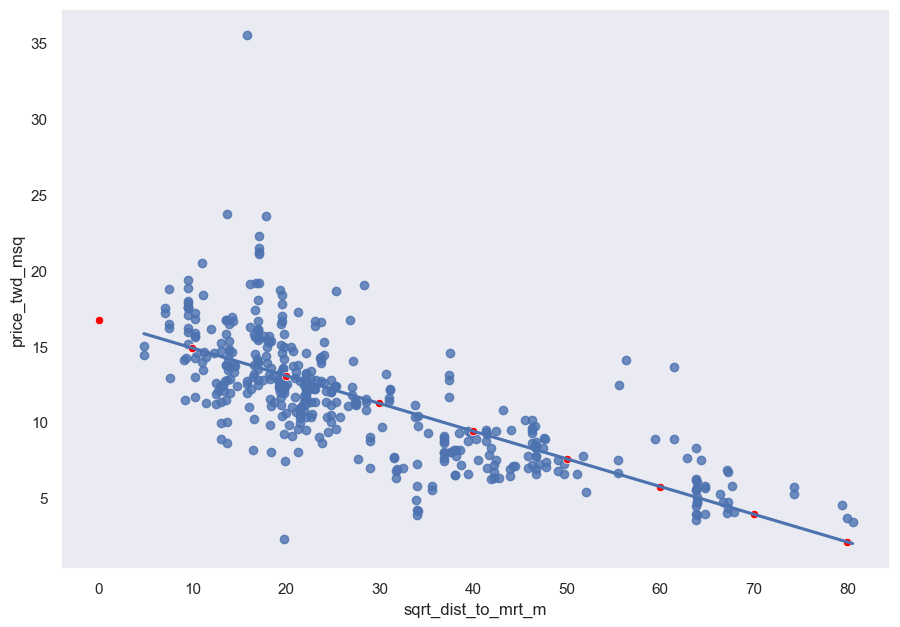

In [25]:
plt.figure()
sns.regplot(x='sqrt_dist_to_mrt_m', y = 'price_twd_msq', data = taiwan_real_estate, ci= None)

sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data = prediction_data, color ='red')
plt.show()

In [26]:
## Transforming the response variable too
import pandas as pd
ad_conversion= pd.read_csv('Downloads/ad_conversion.csv')

ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


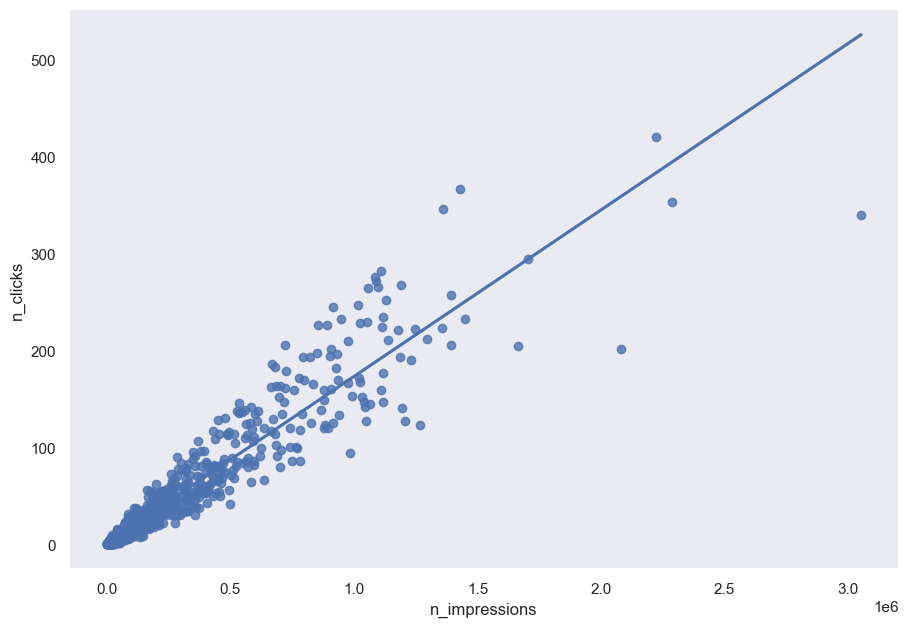

In [27]:
sns.regplot(x='n_impressions', y= 'n_clicks', data = ad_conversion, ci=None)
plt.show()

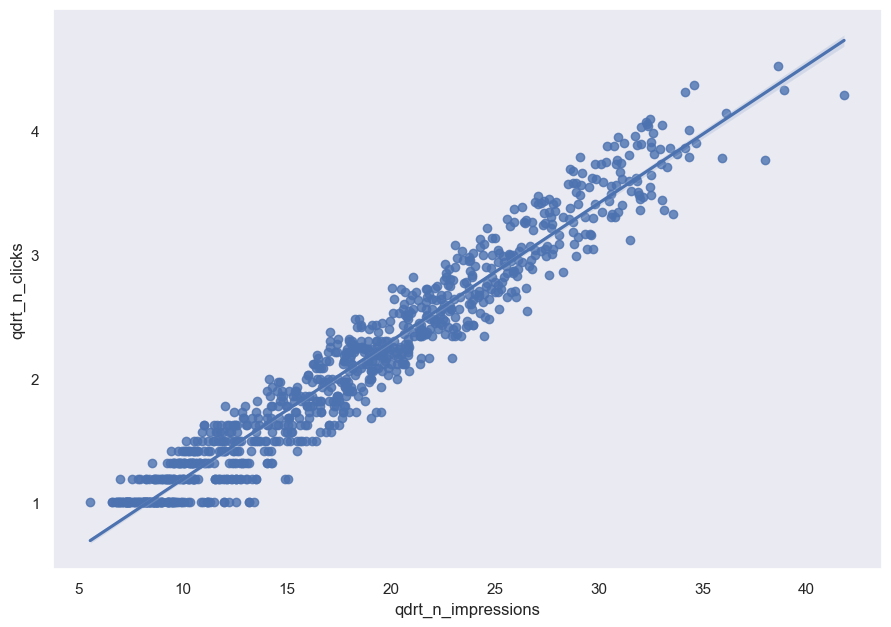

In [28]:
## Transforming n_impressions and n_clicks

ad_conversion['qdrt_n_impressions'] = ad_conversion['n_impressions'] ** 0.25
ad_conversion['qdrt_n_clicks'] = ad_conversion['n_clicks'] ** 0.25

sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data =ad_conversion)
plt.show()

In [29]:
## Fitting the model on ad_conversion

mdl_imp_vs_clks = ols('qdrt_n_clicks ~ qdrt_n_impressions', data = ad_conversion).fit()
print(mdl_imp_vs_clks.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:27:11   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [30]:
## Fitting the model on test data

explanatory_data = pd.DataFrame({'qdrt_n_impressions': np.arange(0,3e6+1, 5e5) ** 0.25, 'n_impressions':np.arange(0,3e6+1,5e5)})

prediction_data = explanatory_data.assign(qdrt_n_clicks = mdl_imp_vs_clks.predict(explanatory_data))
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


In [31]:
## Back Transformation

prediction_data['n_clicks'] = prediction_data['qdrt_n_clicks'] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


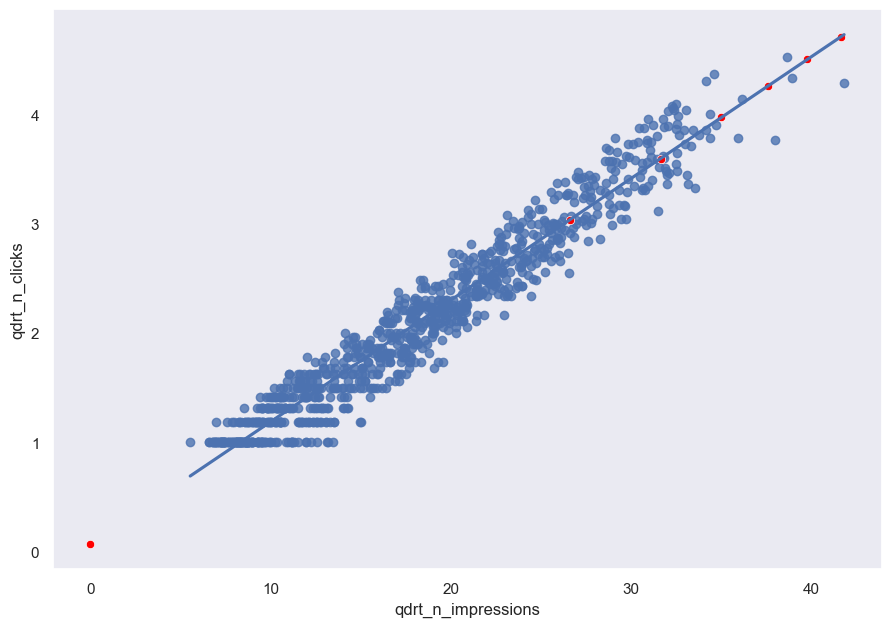

In [32]:
fig = plt.figure()

sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data =ad_conversion, ci=None)

sns.scatterplot(x='qdrt_n_impressions', y ='qdrt_n_clicks', data = prediction_data, color ='red')
plt.show()

## Quantifying a model fit

In [38]:
## Coefficient of determination

mdl_clicks_impressions = ols('n_clicks ~ n_impressions', data = ad_conversion).fit()
print(mdl_clicks_impressions.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:28:04   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [40]:
mdl_clicks_imp_trans = ols('qdrt_n_clicks ~ qdrt_n_impressions', data = ad_conversion).fit()
print(mdl_clicks_imp_trans.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:29:47   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

## Residual Standard Error

In [42]:
mse_orig = mdl_clicks_impressions.mse_resid
rse_orig = np.sqrt(mse_orig)
print(rse_orig)

mse_trans = mdl_clicks_imp_trans.mse_resid

rse_trans = np.sqrt(mse_trans)
print(rse_trans)

19.905838862478138
0.19690640896875727


Text(0, 0.5, 'Residuals')

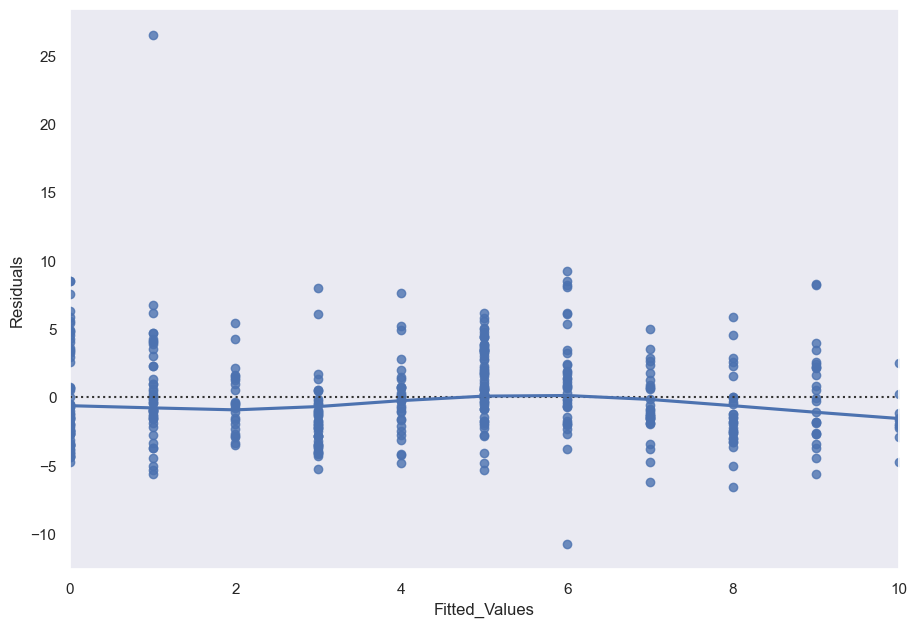

In [43]:
## Drawing diagnostic plots
# Plot the residuals vs. fitted values

sns.residplot(x='n_convenience', y= 'price_twd_msq', data = taiwan_real_estate, lowess = True)
plt.xlabel('Fitted_Values')
plt.ylabel('Residuals')

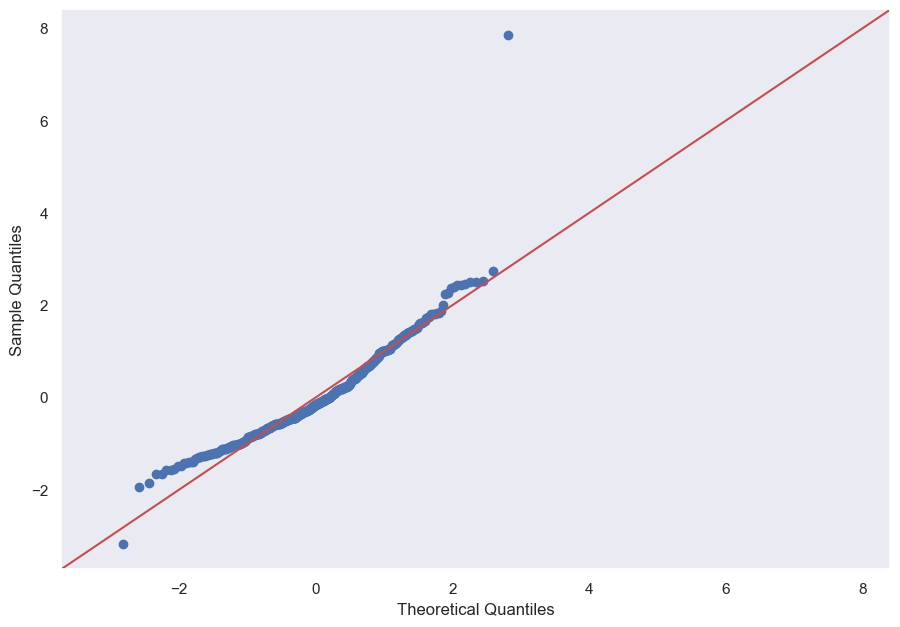

In [45]:
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data = mdl_price_vs_con.resid, fit = True, line='45')
plt.show()

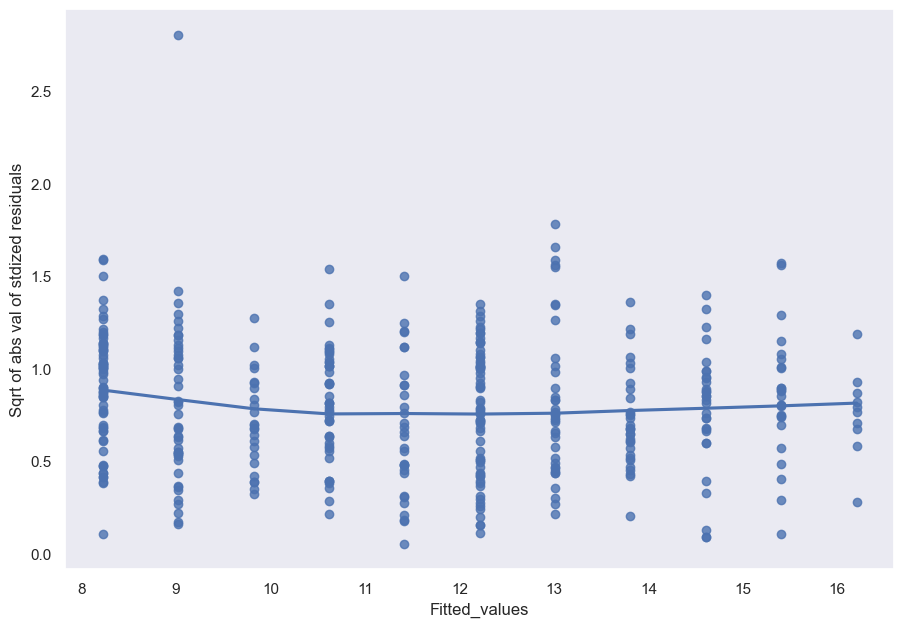

In [47]:
## Preprocessing steps

mdl_norm_resid = mdl_price_vs_con.get_influence().resid_studentized_internal
mdl_norm_resid_abs_sqrt = np.sqrt(np.abs(mdl_norm_resid))

sns.regplot(x= mdl_price_vs_con.fittedvalues, y = mdl_norm_resid_abs_sqrt, ci = None, lowess =True)
plt.xlabel('Fitted_values')
plt.ylabel('Sqrt of abs val of stdized residuals')
plt.show()

## Outliers, influence, and Leverage

In [48]:
summary_info = mdl_price_vs_dist.get_influence().summary_frame()
print(summary_info)

     dfb_Intercept  dfb_sqrt_dist_to_mrt_m       cooks_d  standard_resid  \
0        -0.094893                0.073542  4.648246e-03       -1.266363   
1        -0.013981                0.008690  1.216711e-04       -0.262996   
2         0.025510               -0.009963  6.231096e-04        0.688143   
3         0.055525               -0.021686  2.939394e-03        1.494602   
4        -0.000932                0.000518  6.055123e-07       -0.019716   
..             ...                     ...           ...             ...   
409       0.008900               -0.014008  1.195505e-04       -0.131593   
410       0.004156               -0.003205  8.977830e-06        0.056158   
411      -0.013612                0.007560  1.290873e-04       -0.287940   
412       0.026876               -0.020453  3.782254e-04        0.372644   
413       0.115280               -0.088885  6.866358e-03        1.553075   

     hat_diag  dffits_internal  student_resid    dffits  
0    0.005764        -0.09641

In [51]:
# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate['leverage'] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
# print(taiwan_real_estate.sort_values(by='leverage', ascending = False))

# Sort taiwan_real_estate by leverage in descending order and print the head
taiwan_real_estate['cooks_dist'] = summary_info['cooks_d']

print(taiwan_real_estate.sort_values(by='leverage', ascending = False))

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  leverage  \
347      6488.0210              1        15 to 30       3.388805  0.026665   
116      6396.2830              1        30 to 45       3.691377  0.026135   
249      6306.1530              1        15 to 30       4.538578  0.025617   
255      5512.0380              1        30 to 45       5.264750  0.021142   
8        5512.0380              1        30 to 45       5.688351  0.021142   
..             ...            ...             ...            ...       ...   
269       837.7233              0        15 to 30       6.959153  0.002417   
126       804.6897              4        30 to 45      19.031770  0.002416   
265       815.9314              4        15 to 30      11.527988  0.002415   
159       815.9314              4        15 to 30      11.316188  0.002415   
157       815.9314              4        15 to 30      10.771558  0.002415   

       cooks_dist  
347  3.507712e-03  
116  4.469528e-03  
249

# Logistic Regression

### Exploring the explanatory variables

# churn = pd.read_csv('Downloads/churn.csv')
churn.head()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_1020\3799910169.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['time_since_last_purchase'])


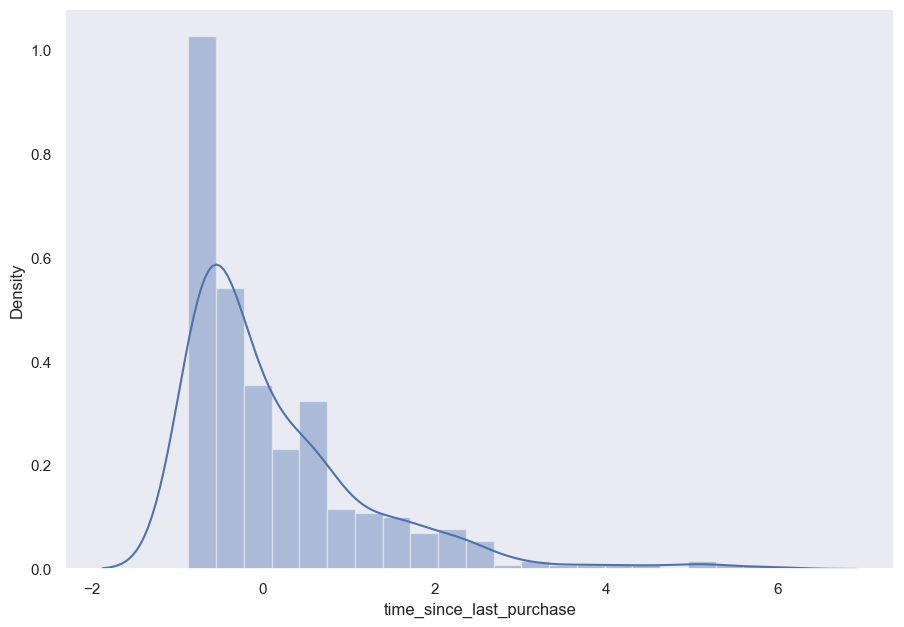

[0 1]


C:\Users\Ravi\AppData\Local\Temp\ipykernel_1020\3799910169.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist = True, rug = True)
C:\Users\Ravi\AppData\Local\Temp\ipykernel_1020\3799910169.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist = True, rug = True)
C:\Progr

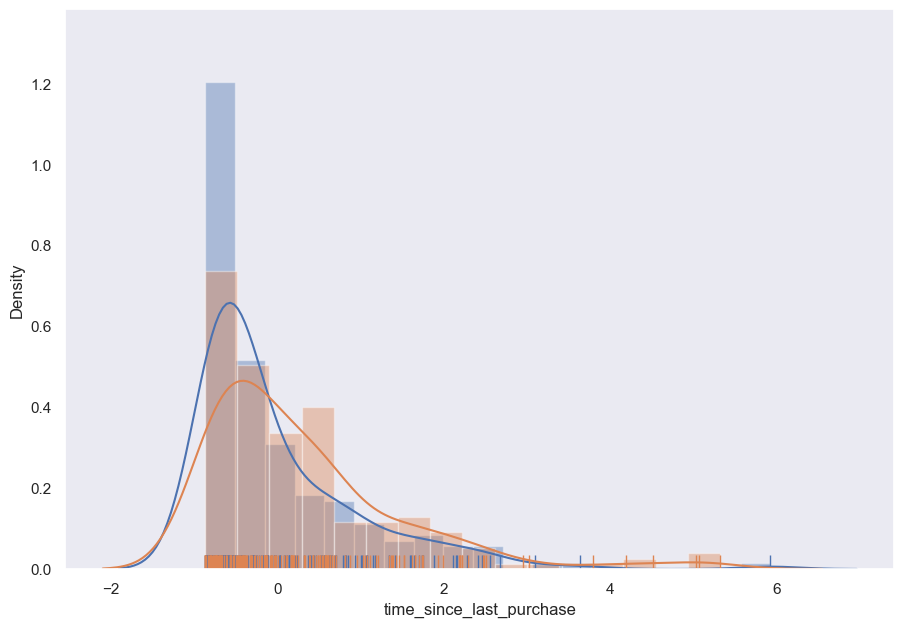

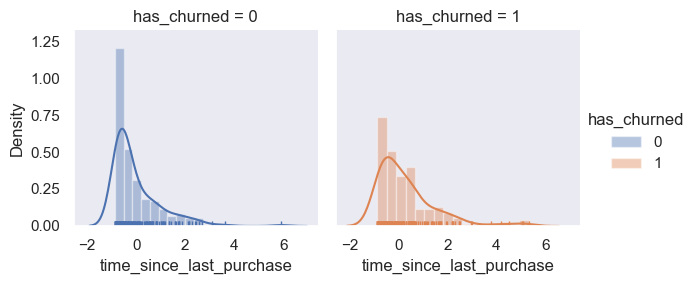

In [61]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.distplot(churn['time_since_last_purchase'])
plt.show()
print(churn['has_churned'].unique())

for x in churn['has_churned'].unique():
    values = churn.time_since_last_purchase[churn['has_churned'] == x]
    sns.distplot(values, hist = True, rug = True)
    
g = sns.FacetGrid(churn, col = 'has_churned', hue = 'has_churned')
p1 = g.map(sns.distplot, 'time_since_last_purchase', hist = True, rug =True).add_legend()


C:\Users\Ravi\AppData\Local\Temp\ipykernel_1020\3033810175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['time_since_first_purchase'])


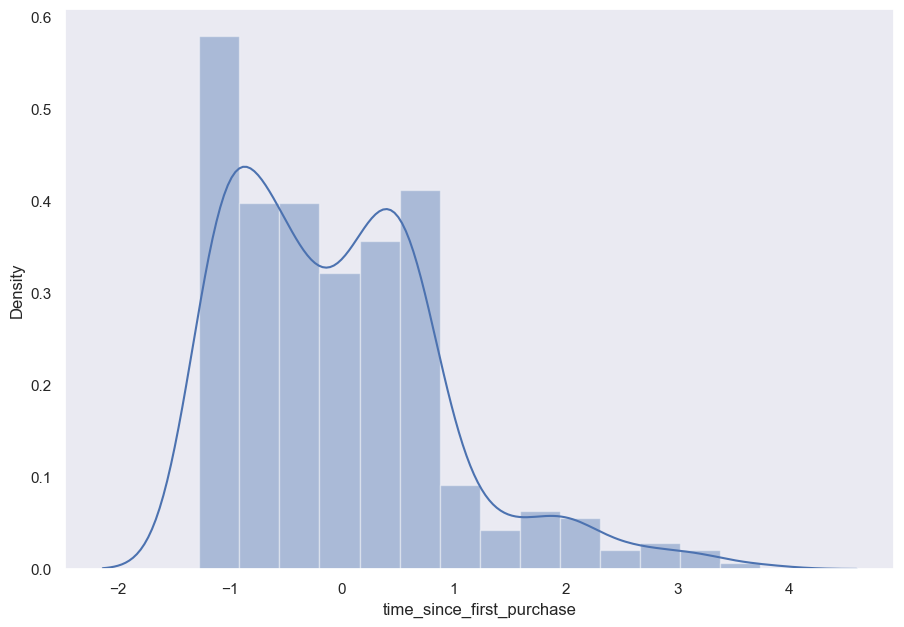

[0 1]


C:\Users\Ravi\AppData\Local\Temp\ipykernel_1020\3033810175.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist = True, rug = True)
C:\Users\Ravi\AppData\Local\Temp\ipykernel_1020\3033810175.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist = True, rug = True)
C:\Progr

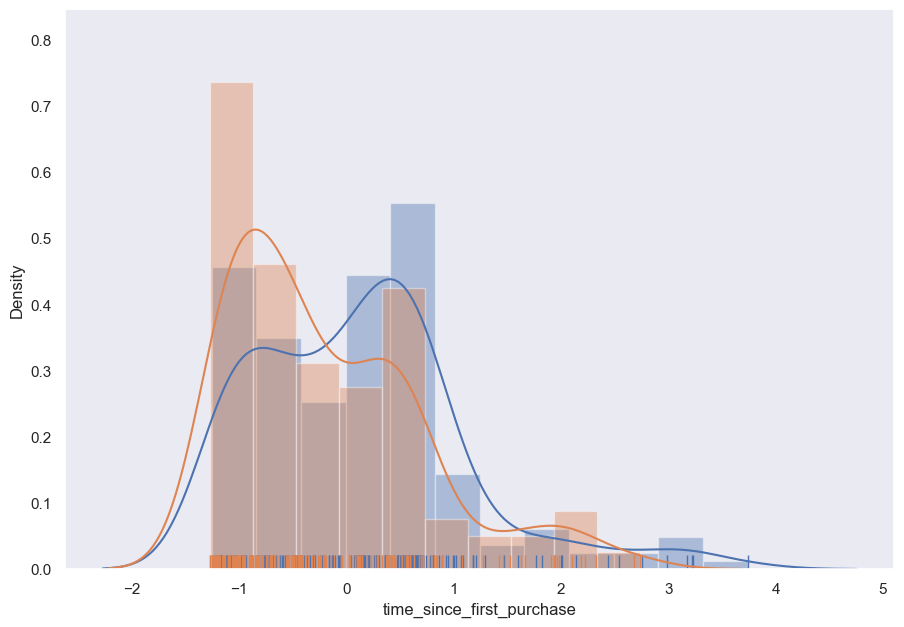

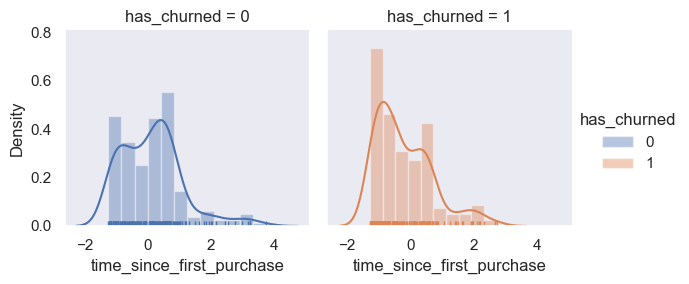

In [62]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.distplot(churn['time_since_first_purchase'])
plt.show()

print(churn['has_churned'].unique())

for x in churn['has_churned'].unique():
    values = churn.time_since_first_purchase[churn['has_churned'] == x]
    sns.distplot(values, hist = True, rug = True)
    
g = sns.FacetGrid(churn, col = 'has_churned', hue = 'has_churned')
p1 = g.map(sns.distplot, 'time_since_first_purchase', hist = True, rug =True).add_legend()

### Visualizing linear and logistic models


<Axes: xlabel='time_since_first_purchase', ylabel='has_churned'>

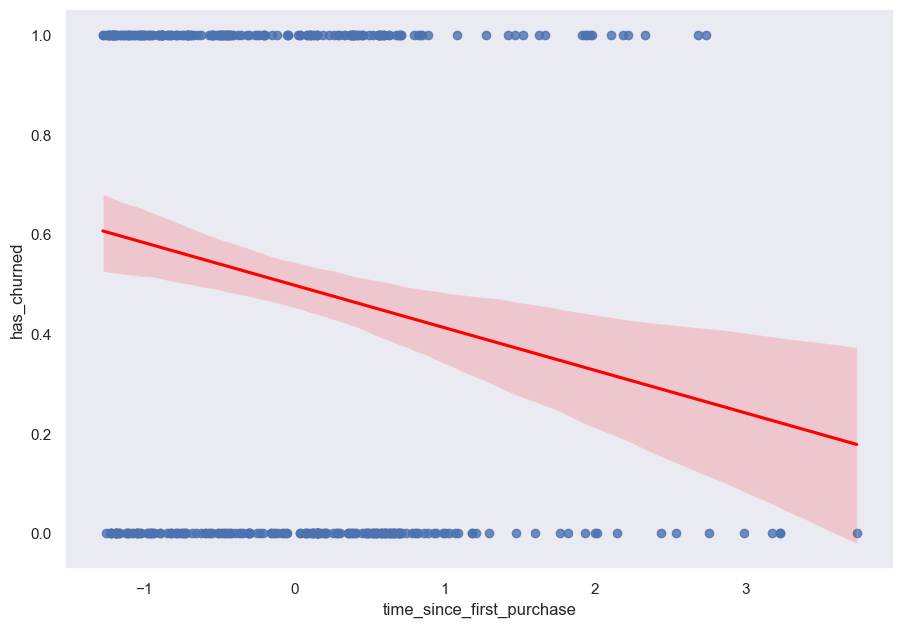

In [63]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x = 'time_since_first_purchase', y ='has_churned', data = churn, line_kws = {'color':'red'})

<Axes: xlabel='time_since_first_purchase', ylabel='has_churned'>

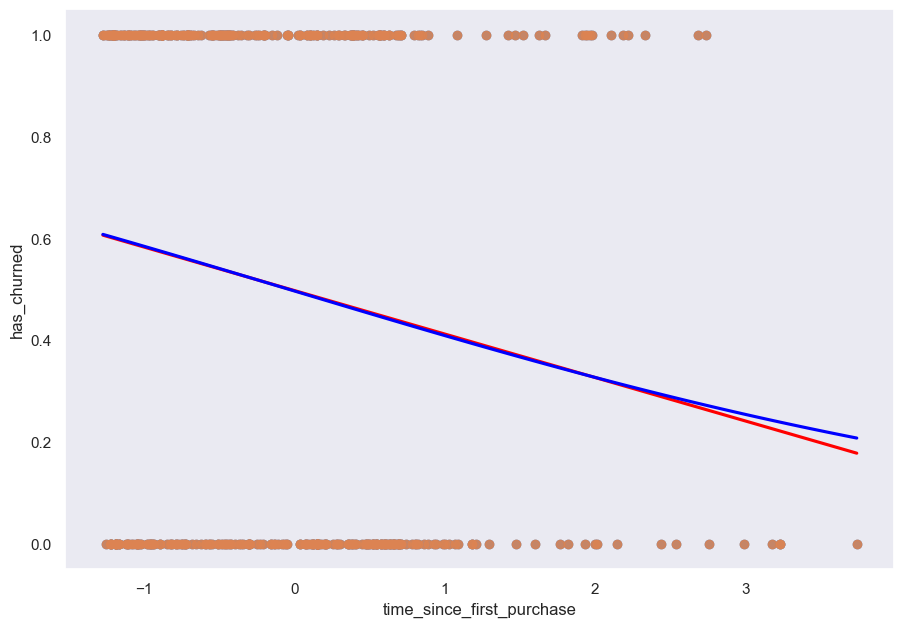

In [66]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned

sns.regplot(x = 'time_since_first_purchase', y ='has_churned', data = churn, line_kws = {'color':'red'}, ci = None)

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned

sns.regplot(x='time_since_first_purchase', y= 'has_churned', data = churn, ci =None, logistic = True, 
            line_kws = {'color':"blue"})



## Logistic Regression with Logit

In [67]:
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. 
# length of relationship using the churn dataset

mdl_churn_vs_purchase = logit('has_churned ~ time_since_first_purchase', data = churn).fit()

print(mdl_churn_vs_purchase.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


### Probabilities

    time_since_first_purchase  has_churned
0                       -1.50     0.626448
1                       -1.15     0.596964
2                       -0.80     0.566762
3                       -0.45     0.536056
4                       -0.10     0.505074
5                        0.25     0.474053
6                        0.60     0.443230
7                        0.95     0.412839
8                        1.30     0.383098
9                        1.65     0.354207
10                       2.00     0.326342
11                       2.35     0.299653
12                       2.70     0.274257
13                       3.05     0.250244
14                       3.40     0.227675
15                       3.75     0.206580


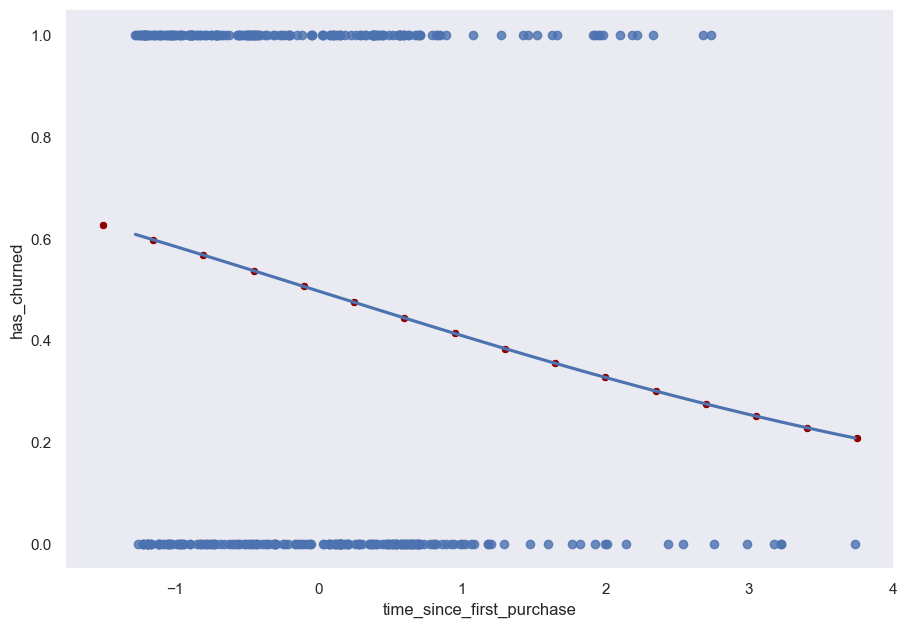

In [71]:
## create explanatory data

explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1.5, 4, 0.35)})

prediction_data = explanatory_data.assign(has_churned = mdl_churn_vs_purchase.predict(explanatory_data))

print(prediction_data)

fig = plt.figure()

sns.regplot(x='time_since_first_purchase', y ='has_churned', data=churn, ci = None, logistic = True)

# Overlay with prediction_data, colored red
sns.scatterplot(x= 'time_since_first_purchase', y = 'has_churned', data = prediction_data, color = 'darkred')
plt.show()

### Most likely outcome

    time_since_first_purchase  has_churned  most_likely_outcome
0                       -1.50     0.626448                  1.0
1                       -1.15     0.596964                  1.0
2                       -0.80     0.566762                  1.0
3                       -0.45     0.536056                  1.0
4                       -0.10     0.505074                  1.0
5                        0.25     0.474053                  0.0
6                        0.60     0.443230                  0.0
7                        0.95     0.412839                  0.0
8                        1.30     0.383098                  0.0
9                        1.65     0.354207                  0.0
10                       2.00     0.326342                  0.0
11                       2.35     0.299653                  0.0
12                       2.70     0.274257                  0.0
13                       3.05     0.250244                  0.0
14                       3.40     0.2276

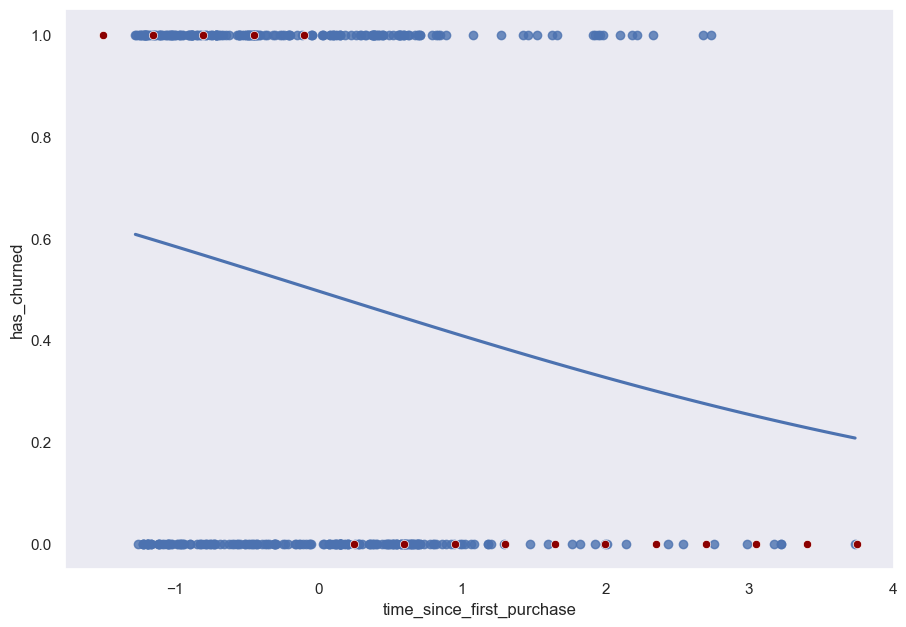

In [74]:
# Update prediction data by adding most_likely_outcome
prediction_data['most_likely_outcome'] = np.round(prediction_data['has_churned'])

print(prediction_data)

fig = plt.figure()

sns.regplot(x='time_since_first_purchase', y ='has_churned', data=churn, ci = None, logistic = True)

# Overlay with prediction_data, colored red
sns.scatterplot(x= 'time_since_first_purchase', y = 'most_likely_outcome', data = prediction_data, color = 'darkred')
plt.show()

## Odds Ratio

    time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                       -1.50     0.626448                  1.0    1.677003
1                       -1.15     0.596964                  1.0    1.481166
2                       -0.80     0.566762                  1.0    1.308199
3                       -0.45     0.536056                  1.0    1.155431
4                       -0.10     0.505074                  1.0    1.020502
5                        0.25     0.474053                  0.0    0.901331
6                        0.60     0.443230                  0.0    0.796075
7                        0.95     0.412839                  0.0    0.703112
8                        1.30     0.383098                  0.0    0.621004
9                        1.65     0.354207                  0.0    0.548484
10                       2.00     0.326342                  0.0    0.484434
11                       2.35     0.299653                  0.0    0.427863
12          

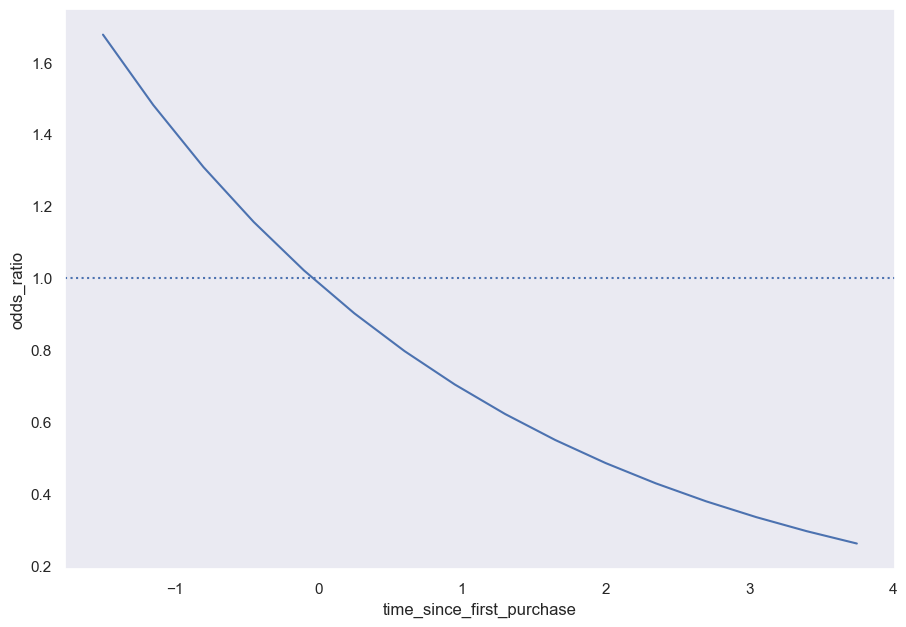

In [80]:
# Update prediction data with odds_ratio
prediction_data['odds_ratio'] = prediction_data['has_churned'] / (1 - prediction_data['has_churned'])

print(prediction_data)

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y ='odds_ratio', data =prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")
plt.show()

### Log Odds Ratio

    time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                       -1.50     0.626448                  1.0    1.677003   
1                       -1.15     0.596964                  1.0    1.481166   
2                       -0.80     0.566762                  1.0    1.308199   
3                       -0.45     0.536056                  1.0    1.155431   
4                       -0.10     0.505074                  1.0    1.020502   
5                        0.25     0.474053                  0.0    0.901331   
6                        0.60     0.443230                  0.0    0.796075   
7                        0.95     0.412839                  0.0    0.703112   
8                        1.30     0.383098                  0.0    0.621004   
9                        1.65     0.354207                  0.0    0.548484   
10                       2.00     0.326342                  0.0    0.484434   
11                       2.35     0.299653          

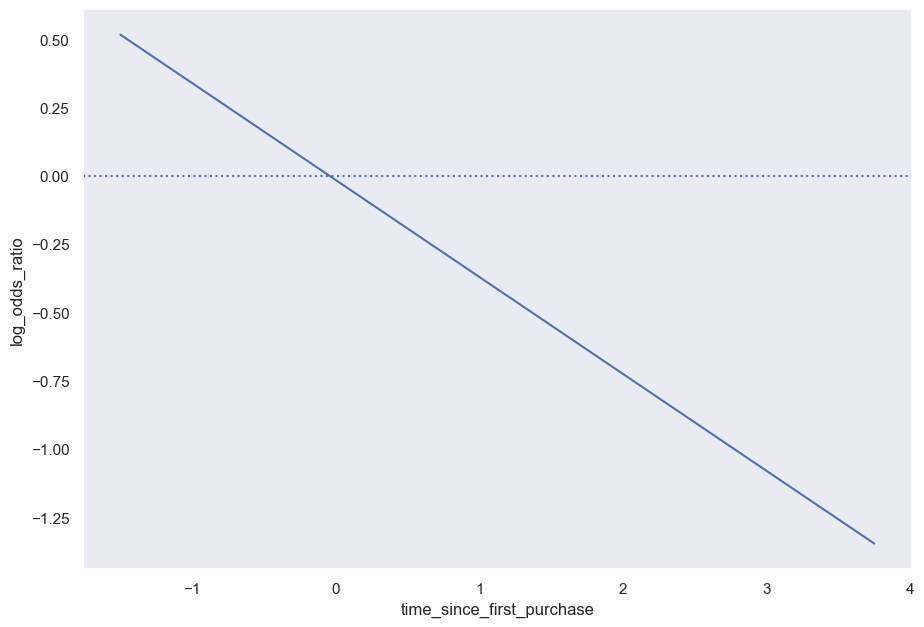

In [84]:
# Update prediction data with log_odds_ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])

print(prediction_data)

# Create a line plot of log_odds_ratio vs time_since_first_purchase
sns.lineplot(x= 'time_since_first_purchase', y = 'log_odds_ratio', data= prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=0, linestyle = 'dotted')
plt.show()

### Calculating the confusion matrix


In [87]:
## Get actual_values

actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_purchase.predict())

# Create outcomes as a DataFrame of both Series
outcome = pd.DataFrame({"actual_response": actual_response, 
                       "predicted_response" :predicted_response})

print(type(outcome))
print(outcome.columns)

conf_mat = pd.crosstab(outcome['actual_response'], outcome['predicted_response'], rownames =['Actual'], colnames =['Predicted'])
print(conf_mat)

<class 'pandas.core.frame.DataFrame'>
Index(['actual_response', 'predicted_response'], dtype='object')
Predicted  0.0  1.0
Actual             
0          112   88
1           76  124


[[112.  88.]
 [ 76. 124.]]


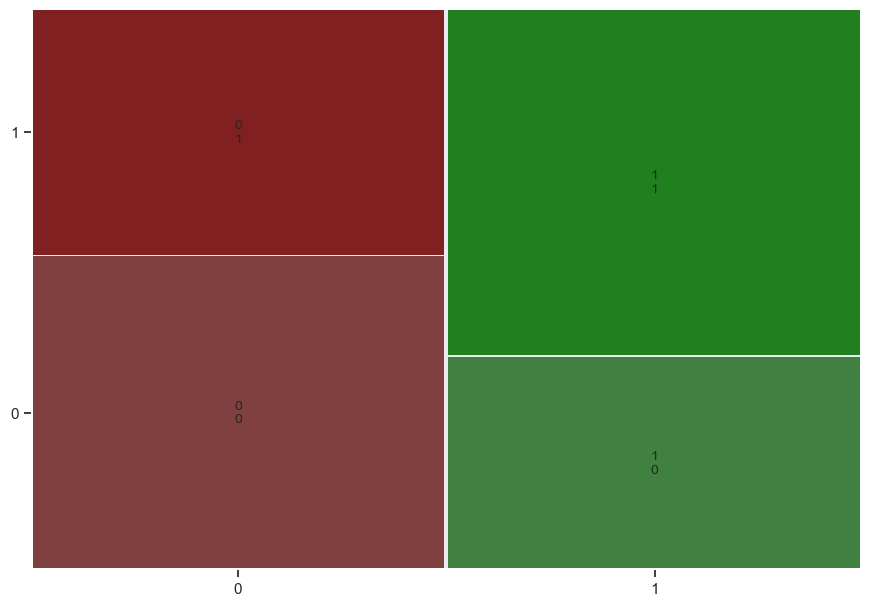

In [89]:
## Drawing a mosaic plot of conf_matrix

# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

conf_mat = mdl_churn_vs_purchase.pred_table()
print(conf_mat)

mosaic(conf_mat)
plt.show()

In [90]:
## Extract Tp, TN, FP, FN from confusion matrix

TP = conf_mat[1,1]
TN =conf_mat[0,0]
FN = conf_mat[1,0]
FP = conf_mat[0,1]

## Calculate Accuracy
Accuracy= (TP + TN)/(TP+TN+FP+FN)
print(Accuracy)

## Calculate Sensitivity

Sensitivity = TP / (TP+FN)
print(Sensitivity)

## Calcuate Specificity

Specificity = TN / (TP + TN)
print(Specificity)

0.59
0.62
0.4745762711864407
